# Dask Delayed

We will generally be convering the `dask.delayed()` function to delay the evaluation of exsiting workloads.

It can be used with existing serial workloads to run synchronous tasks in parallel.

Reference: [dask-tutorial](https://github.com/dask/dask-tutorial)

### Viewing the cluster dashboard
This next code snippet is optional however, it provides a cool dashboard to help you view task execution

In [9]:
from dask.distributed import Client

client = Client(n_workers=4)
client

<Client: 'tcp://127.0.0.1:60329' processes=4 threads=8, memory=8.59 GB>

### Executing simple workloads

Lets set up some functions which will be used to simulate some workload

In [10]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

#### Synchronously by default

In [11]:
%%time 

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 386 ms, sys: 67.4 ms, total: 453 ms
Wall time: 3.01 s


#### Parallelize with `dask.delayed()`

In [12]:
from dask import delayed

In [13]:
%%time 

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

CPU times: user 978 µs, sys: 165 µs, total: 1.14 ms
Wall time: 1.27 ms


As we can see, this ran immediately as nothing has happened yet. 
The delayed function builds a task graph and prepares it for execution.

This is because we need to run `.compute()` to execute the workload.

In [14]:
%%time
z.compute()

CPU times: user 251 ms, sys: 41.4 ms, total: 292 ms
Wall time: 2.03 s


5

The time to execute only took 2 seconds because the inc functions were executed in parallel.

We can view the task graph using the `.visualize()` method

In [6]:
z.visualize()

## Parallelize a for loop

In [16]:
data = [1, 2, 3, 4, 5, 6, 7, 8]

In [17]:
%%time

# Serial code

results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 922 ms, sys: 161 ms, total: 1.08 s
Wall time: 8.04 s


In [20]:
%%time

# Parallel code

results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
total.compute()

CPU times: user 163 ms, sys: 25 ms, total: 188 ms
Wall time: 1.03 s


44

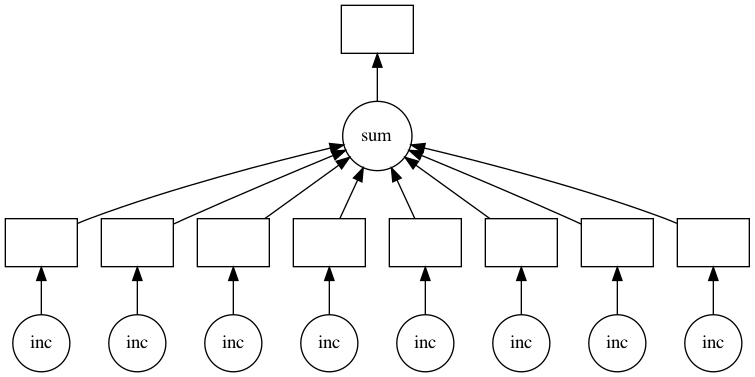

In [21]:
total.visualize()